In [3]:
import numpy as np
import xrayutilities as xu
import matplotlib.pyplot as plt
from silx.io.specfile import SpecFile,Scan
import hdf5plugin
import fabio

# %matplotlib nbagg


In [ ]:
# Nd = xu.materials.elements.Nd
# Ni = xu.materials.elements.Ni
# O = xu.materials.elements.O

# NNO = xu.materials.Crystal(
#     "NNO", xu.materials.SGLattice(123, 3.905, 3.30, atoms=[Nd, Ni,O],
#                                   pos=['1d', '1a','2f']))

In [ ]:
# # plt.figure()
# NNO.show_unitcell()
# plt.show()

# checking scans

In [7]:
scan_num = 5

# base_path = r'D:\Stanford\My Drive\temp\202308_SSRL_XRD_nickelate\data\NNO_STO'
base_path = r'/msd_data/checkout/bl17-2/Aug2023_Li/NNO_STO'
scan_dir = 'cdw_mesh'
file_name = scan_dir+'_scan'+str(scan_num).zfill(3) +'_master.h5'


# ============ load spec file ====================
# sf = SpecFile(r"D:\Stanford\My Drive\temp\202308_SSRL_XRD_nickelate\data\NNO_STO\cdw_mesh\cdw_mesh")
sf = SpecFile(base_path+ "/"  + scan_dir + "/" +scan_dir )
scan = sf[scan_num-1]

# ============ load img file ====================
f_start, f_end = 7000, 7202
# imgs = np.array(fabio.open(base_path+'/'+scan_dir+'/images/'+file_name).dataset[0]).astype(float)
# imgs[imgs > 1e8] = np.nan
imgs = np.zeros([f_end-f_start, 1065, 1030])
print(np.shape(scan.data)[1])
for n in np.arange(f_start,f_end):
    try:
        imgs[n-f_start,:,:]=fabio.open(base_path +'/'+ scan_dir+ '/images/'+ file_name[:-10]+'/'+ file_name[:-10] +'_'+str(n).zfill(4)+'.tif').data
    except:
        imgs[n-f_start,:,:] = imgs[n-f_start-1,:,:]
np.array(imgs)
print('scan number: ' + str(scan.number) + ', length: ' + str(np.shape(scan.data)[1])+ str(np.shape(imgs)))




for line in scan.header:
    if line[:3] == '#G3':
        UB = np.array(line.split(' ')[-9:]).astype(float).reshape([3,3])
    if line[:3] == '#P0':
        angles = np.array(line.split(' ')[1:-2]).astype(float)
    if line[:4] == '#P14':
        energy = np.array(line.split(' ')[4]).astype(float)

try:
    tt = scan.data_column_by_name('del')[f_start:f_end]
except:
    tt = angles[0] * np.ones(f_end-f_start)
    
try:
    eta = scan.data_column_by_name('eta')[f_start:f_end]
except:
    eta = angles[1] * np.ones(f_end-f_start)

try:
    chi = scan.data_column_by_name('chi')[f_start:f_end]
except:
    chi = angles[2] * np.ones(f_end-f_start)
    
try:
    phi = scan.data_column_by_name('phi')[f_start:f_end]
except:
    phi = angles[3] * np.ones(f_end-f_start)
    


7703
scan number: 5, length: 7703(202, 1065, 1030)


In [2]:
scan_num = 20

# base_path = r'D:\Stanford\My Drive\temp\202308_SSRL_XRD_nickelate\data\NNO_STO'
base_path = r'/msd_data/checkout/bl17-2/Aug2023_Li/NNO_STO'
scan_dir = 'cdw_mesh'
file_name = scan_dir+'_scan'+str(scan_num).zfill(3) +'_master.h5'


# ============ load spec file ====================
# sf = SpecFile(r"D:\Stanford\My Drive\temp\202308_SSRL_XRD_nickelate\data\NNO_STO\cdw_mesh\cdw_mesh")
sf = SpecFile(base_path+ "/"  + scan_dir + "/" +scan_dir )
scan = sf[scan_num-1]

# ============ load img file ====================
f_start, f_end = 0, np.shape(scan.data)[1]
imgs = np.array(fabio.open(base_path+'/'+scan_dir+'/images/'+file_name).dataset[0]).astype(float)
imgs[imgs > 1e8] = np.nan
# imgs = np.zeros([f_end-f_start, 1065, 1030])
# print(np.shape(scan.data)[1])
# for n in np.arange(f_start,f_end):
#     try:
#         imgs[n-f_start,:,:]=fabio.open(base_path +'/'+ scan_dir+ '/images/'+ file_name[:-10]+'/'+ file_name[:-10] +'_'+str(n).zfill(4)+'.tif').data
#     except:
#         imgs[n-f_start,:,:] = imgs[n-f_start-1,:,:]
# np.array(imgs)
print('scan number: ' + str(scan.number) + ', length: ' + str(np.shape(scan.data)[1])+ str(np.shape(imgs)))

for line in scan.header:
    if line[:3] == '#G3':
        UB = np.array(line.split(' ')[-9:]).astype(float).reshape([3,3])
    if line[:3] == '#P0':
        angles = np.array(line.split(' ')[1:-2]).astype(float)
    if line[:4] == '#P14':
        energy = np.array(line.split(' ')[4]).astype(float)

try:
    tt = scan.data_column_by_name('del')[f_start:f_end]
except:
    tt = angles[0] * np.ones(f_end-f_start)
    
try:
    eta = scan.data_column_by_name('eta')[f_start:f_end]
except:
    eta = angles[1] * np.ones(f_end-f_start)

try:
    chi = scan.data_column_by_name('chi')[f_start:f_end]
except:
    chi = angles[2] * np.ones(f_end-f_start)
    
try:
    phi = scan.data_column_by_name('phi')[f_start:f_end]
except:
    phi = angles[3] * np.ones(f_end-f_start)
    


scan number: 20, length: 21(21, 1065, 1030)


In [4]:
qconversion = xu.QConversion(sampleAxis = ['z-','y+','z-'], detectorAxis = ['z-'], r_i = [0,1,0])

hxrd = xu.HXRD( [0,1,0], [0,0,1], en = energy, qconv =  qconversion)

hxrd.Ang2Q.init_area(
        'z-', 'x-',
        cch1=521, cch2=530,
        Nch1=1065, Nch2=1030,
        pwidth1=0.075, pwidth2=0.075,
        distance=535
    )

In [5]:
angle_values =   [eta, chi, phi, tt]   #[[26.056],  [13.028]]
qx, qy, qz = hxrd.Ang2Q.area(*angle_values, UB=UB)

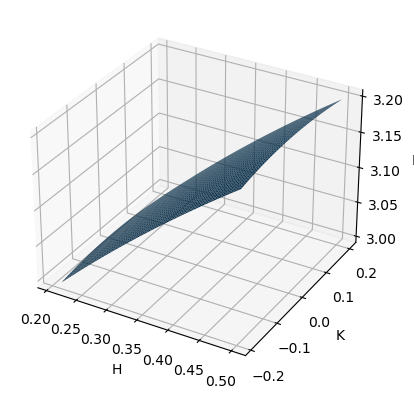

In [6]:
idx = 6
# print([np.nanmean(qx, axis = (1,2)) -scan.data_column_by_name('H')], 
#       [np.nanmean(qy, axis = (1,2)) -scan.data_column_by_name('K')], 
#       [np.nanmean(qz, axis = (1,2)) -scan.data_column_by_name('L')])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(qx[idx],qy[idx],qz[idx])
ax.set_xlabel('H')
ax.set_ylabel('K')
ax.set_zlabel('L')

plt.show()

In [21]:
xu.Gridder3D.KeepData??

Signature: xu.Gridder3D.KeepData(self, bool)
Docstring: <no docstring>
Source:   
    def KeepData(self, bool):
        if bool not in [False, True]:
            raise TypeError("Keep Data flag must be a boolan value"
                            "(True/False)!")

        self.keep_data = bool
File:      ~/miniconda3/envs/rmap/lib/python3.11/site-packages/xrayutilities/gridder.py
Type:      function

In [9]:
h_min,h_max = [np.min(qx), np.max(qx)]
k_min,k_max = [np.min(qy), np.max(qy)]
l_min,l_max = [np.min(qz), np.max(qz)]

h_n, k_n, l_n = [50, 50, 50]

gridder = xu.Gridder3D(nx=h_n, ny=k_n, nz=l_n)
gridder.KeepData(True)
gridder.dataRange(
    xmin=h_min, xmax=h_max,
    ymin=k_min, ymax=k_max,
    zmin=l_min, zmax=l_max,
    fixed=True
)

gridder(qx, qy, qz, imgs)

grid_data = gridder.data

coords = np.array([gridder.xaxis, gridder.yaxis, gridder.zaxis])


In [18]:
np.shape(imgs)

(241, 1065, 1030)

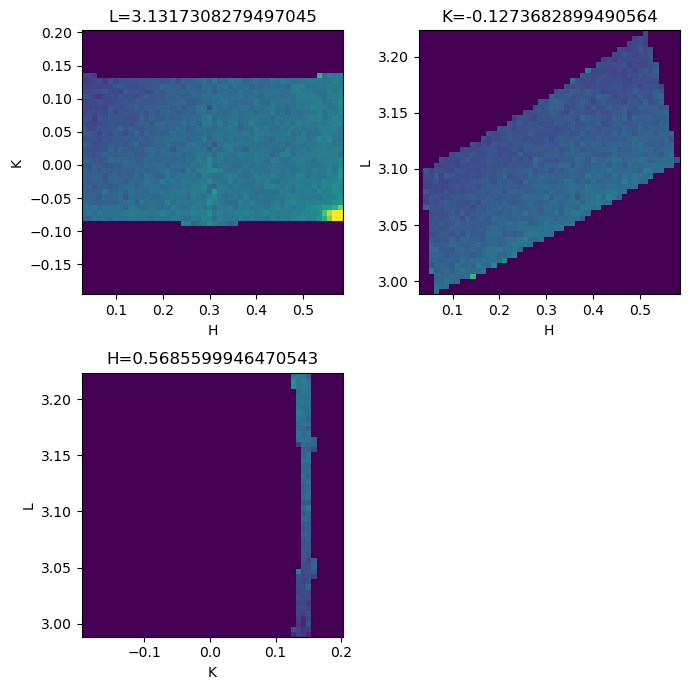

In [57]:
ix,iy,iz = 48,8,30
vmin, vmax = np.nanpercentile(imgs, [20,95])
plt.figure(figsize = (7,7))
plt.subplot(221)
xx,yy = np.meshgrid(coords[0],coords[1])
plt.pcolor(xx,yy,grid_data[:,:,iz], vmin = vmin, vmax = vmax)
plt.title('L='+str(coords[2,iz]))
plt.xlabel('H')
plt.ylabel('K')

plt.subplot(222)
xx,yy = np.meshgrid(coords[0],coords[2])
plt.pcolor(xx,yy,grid_data[:,iy,:], vmin = vmin, vmax = vmax)
plt.title('K='+str(coords[1,iy]))
plt.xlabel('H')
plt.ylabel('L')

plt.subplot(223)
xx,yy = np.meshgrid(coords[1],coords[2])
plt.pcolor(xx,yy,grid_data[ix,:,:], vmin = vmin, vmax = vmax)
plt.title('H='+str(coords[0,ix]))
plt.xlabel('K')
plt.ylabel('L')

plt.tight_layout()
plt.show()